In [1]:
import os
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt

with open('../data/20241104_0_0_Thang_A.txt', 'r') as f:
    data_string = f.read()

df = pd.read_csv(StringIO(data_string), sep='\t')

df

,time,DeviceName,AccX(g),AccY(g),AccZ(g),AsX(Â°/s),AsY(Â°/s),AsZ(Â°/s),AngleX(Â°),AngleY(Â°),...,HX(uT),HY(uT),HZ(uT),Q0(),Q1(),Q2(),Q3(),Temperature(Â°C),Version(),Battery level(%)
0,2024-11-4 13:37:30.372,WT901BLE68(B2C0FB98454F),-0.516,-0.920,0.045,24.414,5.005,2.625,-89.66,33.48,...,26.852,29.106,-14.406,0.04636,0.34415,0.61142,-0.71097,24.3,13111,100
1,2024-11-4 13:37:30.433,WT901BLE68(B2C0FB98454F),-0.507,-0.922,0.156,78.247,-10.803,-28.076,-84.73,32.06,...,27.146,25.774,-20.188,0.04636,0.34415,0.61142,-0.71097,24.3,13111,100
2,2024-11-4 13:37:30.555,WT901BLE68(B2C0FB98454F),-0.412,-0.886,0.492,152.954,-2.075,-44.250,-72.19,28.20,...,27.146,25.774,-20.188,0.04636,0.34415,0.61142,-0.71097,24.3,13111,100
3,2024-11-4 13:37:30.643,WT901BLE68(B2C0FB98454F),-0.382,-0.634,0.399,59.692,10.864,-33.447,-63.48,25.19,...,27.146,25.774,-20.188,-0.13647,0.30228,0.44183,-0.83347,24.3,13111,100
4,2024-11-4 13:37:30.764,WT901BLE68(B2C0FB98454F),-0.223,-0.616,0.458,-4.517,26.611,-35.889,-63.19,22.84,...,27.146,25.774,-20.188,-0.13647,0.30228,0.44183,-0.83347,24.3,13111,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2024-11-4 13:37:45.765,WT901BLE68(B2C0FB98454F),-0.923,-0.344,0.047,-81.604,38.940,9.399,-89.22,72.00,...,51.940,-25.186,-14.308,-0.02060,-0.66965,-0.24048,0.70227,24.3,13111,100
154,2024-11-4 13:37:45.885,WT901BLE68(B2C0FB98454F),-0.986,-0.194,0.077,-42.175,35.095,17.029,-104.84,73.21,...,51.940,-25.186,-14.308,-0.02060,-0.66965,-0.24048,0.70227,24.3,13111,100
155,2024-11-4 13:37:45.945,WT901BLE68(B2C0FB98454F),-1.091,-0.427,-0.054,-48.706,7.263,26.123,-117.03,74.68,...,52.626,-21.560,-9.016,-0.02060,-0.66965,-0.24048,0.70227,24.3,13111,100
156,2024-11-4 13:37:46.66,WT901BLE68(B2C0FB98454F),-1.093,-0.434,0.147,6.775,-31.006,-1.892,-115.97,76.17,...,52.626,-21.560,-9.016,-0.02060,-0.66965,-0.24048,0.70227,24.3,13111,100


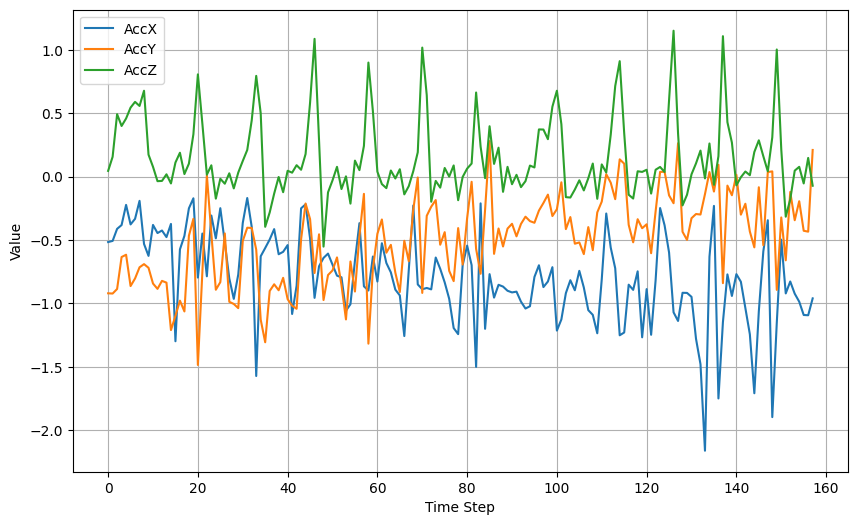

-0.169


: 

In [ ]:
def plot_sensor_data(df):
    # Convert time to numeric index (0,1,2,...)
    x = range(len(df))
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, df['AccX(g)'], label='AccX')
    plt.plot(x, df['AccY(g)'], label='AccY')
    plt.plot(x, df['AccZ(g)'], label='AccZ')
    #plt.plot(x, df['AsX(°/s)'], label='GyroX')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_sensor_data(df)
print(max(df['AccX(g)']))

In [3]:
from sklearn.pipeline import Pipeline
import dvc as dvc
import transforms as tf
import importlib

importlib.reload(dvc)
importlib.reload(tf)

pipeline = Pipeline([
        #("datetime", tf.DataTypeFixer())
        ("datetime", dvc.AzureDataUploader())
    ])

local_data_path = "../data"
#df = pd.read_csv('../data/20241104_0_0_Thang_A.txt', sep='\t')

# Run pipeline
a = pipeline.fit_transform(local_data_path)
